In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from presc.conditional_feature_distribution.conditional_feature_distribution import *



In [2]:
# Set up the test dataset wine quality
dataset = pd.read_csv("../../datasets/winequality.csv")
dataset = dataset.drop(columns=["quality"])


In [3]:
# wine dataset
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5806, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel="linear", decision_function_shape="ovr", class_weight="balanced")
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

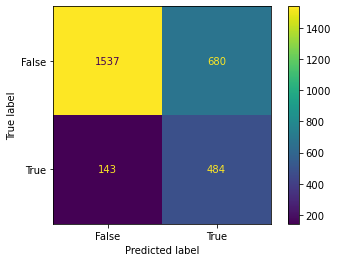

In [4]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

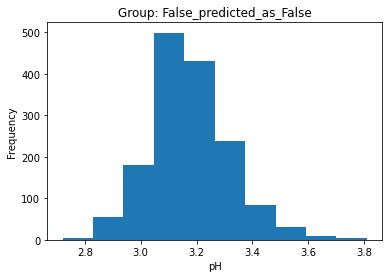

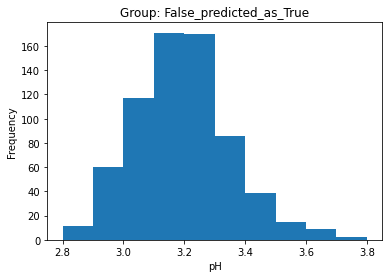

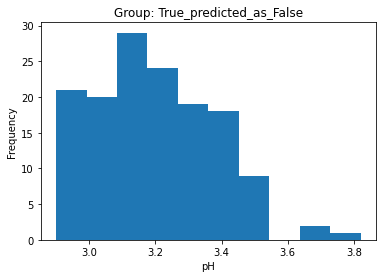

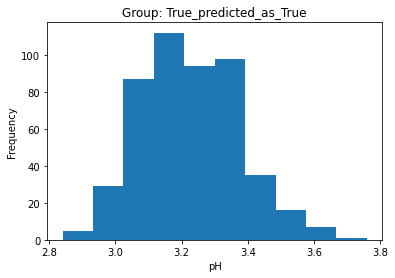

In [5]:
plot_all_histogram_conditional_feature_distribution(y_predict= y_predicted, feature_column= X_test.pH, y_actual= y_test)